#  Overview

The Terry Stops problem aims to predict the outcome of police stops based on reasonable suspicion using a classification model. The model considers various factors such as presence of weapons, time of day, and possibly gender and race of both the officer and the subject. However, the use of race and gender data raises ethical concerns and the importance of avoiding bias and discrimination must be taken into consideration. The goal of this model is to improve the efficiency and fairness of law enforcement actions, but the agencies must also monitor and address any potential biases.

# 1. Business Understanding


## 1.1. Problem
The Terry Stops presents a business opportunity to improve the efficiency and fairness of law enforcement actions. By developing a predictive model that can assist officers in determining the likelihood of an arrest being made during a Terry Stop, the law enforcement agencies can make informed decisions and potentially reduce the number of false arrests and incidents of police misconduct. However, it is important to approach this problem with caution and transparency, considering the ethical concerns raised by the use of gender and race data. The goal is to provide a tool that can help improve policing, while avoiding biases and discrimination.

## 1.2 Aim

The aim of this project is to build a classifier that can predict the outcome of a Terry Stop (whether an arrest was made or not) based on reasonable suspicion. This will be done by considering various factors such as the presence of weapons, time of day of the call, and other relevant information. The model will be designed to address the binary classification problem, with the goal of improving the efficiency and fairness of law enforcement actions.

## 1.3. 0bjectives
* To create a predictive model for Terry Stops that accurately predicts the outcome of the stop (arrest made or not)
* To take into consideration key factors such as the presence of weapons and the time of the call in the model
* To ensure that the model is ethically sound and avoids any biases or discrimination related to gender and race.

# 2. Data Understanding

## 2.1 Data Understanding
This dataset was provided by the City of Seattle and is managed by the Seattle Police Department. It was created on April 13, 2017 and last updated on February 6, 2023. The dataset contains **54873**, rows and **23** columns, each row representing a unique Terry Stop record as reported by the officer conducting the stop. The columns in the dataset include information about the subject of the stop, such as the perceived age group, perceived race, and perceived gender. 

The dataset also includes information about the officer, such as the officer's gender, race, and year of birth. Additionally, the dataset includes information about the resolution of the stop, any weapons found, the date and time the stop was reported, and information about the underlying Computer Aided Dispatch (CAD) event. The data is updated daily and is licensed under the public domain.

# 3. Requirements

* Data Preparation -> Loading Libraries -> Loading data -> Descriptive Exploration -> Data Cleaning -> Exploratory Descriptive Analysis (EDA) -> Pre-processing Data

* Modelling -> Train test split -> Logistic Regression -> K-Nearest -> Decision Tree -> Logistic Regression -> Random Forest
    
* Evaluation -> Classification Metrics -> Best Perfoming Model

* Conclusion -> Best Model
    
* Recommendation -> Most imporatnt features

# 4. Data Preparation

* Loading Libraries 
* Loading data 
* Descriptive Exploration
* Data Cleaning 
* Exploratory Descriptive Analysis (EDA) 
* Pre-processing Data
    * >Update the Stop Resolution column to either be arrested (1) or not arrested (0):
    * >Change the date column to datetime so we can work with it. Add in the month as a new column:
    * >Group weapons into firearms vs. non-firearms vs. no weapon:
    * >Change Officer year of bith to give the officer age:
    * >Drop columns that we are not going to need:
    * >Converting categorical data to numeric format through label encoder

### 4.1. Loading Libraries

In [2]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 4.2. Loading Data

In [3]:
# read the csv file to pandas data frame
Tery_df = pd.read_csv("data/Terry_Stops.csv")

# make copy
Tery_stops_df = Tery_df.copy(deep=True) 

# preview the first 3 rows
Tery_stops_df.head(3)

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,26 - 35,-1,20160000004638,207171,Field Contact,None,6970,1968,M,White,...,01:23:00.0000000,-,-,-,SOUTH PCT 3RD W - ROBERT,N,N,-,-,-
1,18 - 25,-1,20180000352673,484084,Offense Report,None,7794,1991,M,White,...,06:45:00.0000000,TRESPASS,TRESPASS,"TELEPHONE OTHER, NOT 911",NORTH PCT 1ST W - LINCOLN,N,N,North,L,L2
2,26 - 35,-1,20170000399165,325847,Offense Report,None,7795,1992,M,Hispanic or Latino,...,17:28:00.0000000,BURG - RES (INCL UNOCC STRUCTURES ON PROP),"--BURGLARY - RESIDENTIAL, UNOCCUPIED",911,EAST PCT 2ND W - CHARLIE RELIEF,N,N,East,C,C1


### 4.2.1 Dataset Columns
##### These are the  23 columns, with a concise explanation of the information contained in each column :



**Subject Age Group:** Subject Age Group (10 year increments) as reported by the officer.

**Subject ID:** Key, generated daily, identifying unique subjects in the dataset using a character to character match of first name and last name. "Null" values indicate an "anonymous" or "unidentified" subject. Subjects of a Terry Stop are not required to present identification.

**GO/SC Num:** General Offense or Street Check number, relating the Terry Stop to the parent report. This field may have a one to many relationship in the data.

**Terry Stop ID:** Key identifying unique Terry Stop reports.

**Stop Resolution:** Resolution of the stop as reported by the officer.

**Weapon Type:** Type of weapon, if any, identified during a search or frisk of the subject. Indicates "None" if no weapons was found.

**Officer ID:** Key identifying unique officers in the dataset.

**Officer YOB:** Year of birth, as reported by the officer.

**Officer Gender:** Gender of the officer, as reported by the officer.

**Officer Race:** Race of the officer, as reported by the officer.

**Subject Perceived Race:** Perceived race of the subject, as reported by the officer.

**Subject Perceived Gender:** Perceived gender of the subject, as reported by the officer.

**Reported Date:** Date the report was filed in the Records Management System (RMS). Not necessarily the date the stop occurred but generally within 1 day.

**Reported Time:** Time the stop was reported in the Records Management System (RMS). Not the time the stop occurred but generally within 10 hours.

**Initial Call Type:** Initial classification of the call as assigned by 911.

**Final Call Type:** Final classification of the call as assigned by the primary officer closing the event.

**Call Type:** How the call was received by the communication center.

**Officer Squad:** Functional squad assignment (not budget) of the officer as reported by the Data Analytics Platform (DAP).

**Arrest Flag:** Indicator of whether a "physical arrest" was made, of the subject, during the Terry Stop. Does not necessarily reflect a report of an arrest in the Records Management System (RMS).

**Frisk Flag:** Indicator of whether a "frisk" was conducted, by the officer, of the subject, during the Terry Stop.

**Precinct:** Precinct of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.

**Sector:** Sector of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.

**Beat:** Beat of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.




### 4.3.  Descriptive Exploration
Describing the data set in terms of shape and the data types for all the columns present. Most of the columns are categorical and have the 'object' datatype.

In [4]:
# a function to summarise the data set
# check number of categorical and numerical columns
def columns_dtypes(df):
    print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns")
    print()
    num = len(df.select_dtypes(include=np.number).columns)
    cat = len(df.select_dtypes(include='object').columns)
    print(f"Numerical columns: {num}")
    print(f"Categorical columns: {cat}")
    print()
    print("These are the datatypes of column :")
    return df.dtypes

In [5]:
# call the function  
columns_dtypes(Tery_stops_df)

This dataset has 54873 rows and 23 columns

Numerical columns: 4
Categorical columns: 19

These are the datatypes of column :


Subject Age Group           object
Subject ID                   int64
GO / SC Num                  int64
Terry Stop ID                int64
Stop Resolution             object
Weapon Type                 object
Officer ID                  object
Officer YOB                  int64
Officer Gender              object
Officer Race                object
Subject Perceived Race      object
Subject Perceived Gender    object
Reported Date               object
Reported Time               object
Initial Call Type           object
Final Call Type             object
Call Type                   object
Officer Squad               object
Arrest Flag                 object
Frisk Flag                  object
Precinct                    object
Sector                      object
Beat                        object
dtype: object

### 4.4 Data Cleaning

Identifying and correcting inaccuracies, inconsistencies, and irrelevant data from a dataset. These were the steps
* handling missing values
* removing duplicates
* correcting data format
* transforming variables to make the data ready for modelling and predictions.

#### 4.4.1. Missing and Duplicate Values
A function to check duplicates and null

In [6]:
def check_duplicates_missing(dataframe):
    # calculate percentage of missing values
    percent_missing = dataframe.isnull().mean().round(4) * 100
    count_missing = dataframe.isnull().sum()
    # calculate percentage of duplicate rows
    percent_duplicates = dataframe.duplicated().mean() * 100
    # create result dataframe
    result = pd.DataFrame({'Missing Values %': percent_missing, 
                           'Missing Values Count': count_missing, 
                           'Duplicate Values %': percent_duplicates})
    # find column with most missing values
    if percent_missing.max() !=0:
        column_most_missing = percent_missing.idxmax()
        print(f"{(column_most_missing).capitalize()} is the column with most null count.")
        print()
    else:
        print("No column with missing values")
    if percent_duplicates.max() !=0:
        column_most_duplicates = percent_duplicates.idxmax()
        print("Column with most duplicates:",column_most_duplicates)
    else:
        print("No duplicates")
    return result

In [7]:
# call function on the dataset
check_duplicates_missing(Tery_stops_df)

Officer squad is the column with most null count.

No duplicates


,Missing Values %,Missing Values Count,Duplicate Values %
Subject Age Group,0.00,0,0.0
Subject ID,0.00,0,0.0
GO / SC Num,0.00,0,0.0
Terry Stop ID,0.00,0,0.0
Stop Resolution,0.00,0,0.0
Weapon Type,0.00,0,0.0
Officer ID,0.00,0,0.0
Officer YOB,0.00,0,0.0
Officer Gender,0.00,0,0.0
Officer Race,0.00,0,0.0


>I will drop the Officer Squad column because the null values equals to **37.78%**  and the information it contains I will not use for my analysis.

#### 4.4.2. Feature Engineering.
This are the steps taken in correcting data format:
* Update the Stop Resolution column to binary
* Change the date column to datetime
* Group weapons into firearms vs. non-firearms vs. no weapon
* Change Officer year of bith to give the officer age
* To categorize this time as either "daytime" or "nighttime"
* Drop columns that we are not going to need
* Converting categorical data to numeric format through one hot encoding

##### * Fix structural error

In [8]:
# replace with new stings
Tery_stops_df = Tery_stops_df.replace(["-"], "No Information")
Tery_stops_df.head(3)

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,26 - 35,-1,20160000004638,207171,Field Contact,None,6970,1968,M,White,...,01:23:00.0000000,No Information,No Information,No Information,SOUTH PCT 3RD W - ROBERT,N,N,No Information,No Information,No Information
1,18 - 25,-1,20180000352673,484084,Offense Report,None,7794,1991,M,White,...,06:45:00.0000000,TRESPASS,TRESPASS,"TELEPHONE OTHER, NOT 911",NORTH PCT 1ST W - LINCOLN,N,N,North,L,L2
2,26 - 35,-1,20170000399165,325847,Offense Report,None,7795,1992,M,Hispanic or Latino,...,17:28:00.0000000,BURG - RES (INCL UNOCC STRUCTURES ON PROP),"--BURGLARY - RESIDENTIAL, UNOCCUPIED",911,EAST PCT 2ND W - CHARLIE RELIEF,N,N,East,C,C1


##### * Update the Stop Resolution column to binary

In [9]:
# get unique values in stop resolution
stop_resolution_unique = set(Tery_stops_df["Stop Resolution"])
print(f"before:\n{stop_resolution_unique}")

# update to binary the colum values
values = ['Arrest', 'Citation / Infraction', 'Field Contact', 'Offense Report', 'Referred for Prosecution']
conversion_dict = {val: 1 if val == 'Arrest' else 0 for val in values}

# update column in data frame
Tery_stops_df["Stop Resolution"] = Tery_stops_df["Stop Resolution"].map(conversion_dict)
print()
# check data type after update
new_stop_resolution_unique = set(Tery_stops_df["Stop Resolution"])
print(f"after:\n{new_stop_resolution_unique}")

before:
{'Field Contact', 'Citation / Infraction', 'Arrest', 'Offense Report', 'Referred for Prosecution'}

after:
{0, 1}


##### * Change the Reported Date column from object to datetime .

The data description, Reported Date, is the date the report was filed in the Records Management System (RMS). Not necessarily the date of the stop, but generally within one day.
Convert to date time so that I checked how different days and years affected the targert column

In [10]:
# convert to datetime type
Tery_stops_df['Reported Date'] = pd.to_datetime(Tery_stops_df['Reported Date'])

# extract day
Tery_stops_df['Day'] = Tery_stops_df['Reported Date'].dt.day

# extract year
Tery_stops_df['Year'] = Tery_stops_df['Reported Date'].dt.year

# xtract month
Tery_stops_df['Month'] = Tery_stops_df['Reported Date'].dt.month.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July'
                                               ,8:'August',9:'September',10:'October',11:'November',12:'December'})

>There are columns for the day, month and year for each of the Terry-stops in te datammset

##### * Group weapons

##### What is a firearm?

The general classification of firearms can be based on the following criteria: Level of harm they produce. Lethal - designed with the intent to eventually kill the target. Non-lethal - designed with the intent to scare or incapacitate the target, without killing or producing major, irreversible injuries.

This column shwed a list of the type weapons if any, identified during a search or frisk of the subject. Indicates "None" if no weapons was found.

In [11]:
# gets weapons category
weapons = list(dict(Tery_stops_df['Weapon Type'].value_counts()).keys())
print("These are the weapon classes :")
weapons

These are the weapon classes :


['None',
 'No Information',
 'Lethal Cutting Instrument',
 'Knife/Cutting/Stabbing Instrument',
 'Handgun',
 'Blunt Object/Striking Implement',
 'Firearm Other',
 'Firearm',
 'Club, Blackjack, Brass Knuckles',
 'Other Firearm',
 'Mace/Pepper Spray',
 'Firearm (unk type)',
 'Taser/Stun Gun',
 'None/Not Applicable',
 'Fire/Incendiary Device',
 'Club',
 'Rifle',
 'Shotgun',
 'Automatic Handgun',
 'Personal Weapons (hands, feet, etc.)',
 'Brass Knuckles',
 'Blackjack']

I will convert the firearm category to binary, it will be **Firearm** is designed with the intent to eventually kill the target and **Non Firearm** if designed with the intent to scare or incapacitate the target, without killing or producing major, irreversible injuries. 

In [12]:
# map the new values to the weapon found column
Tery_stops_df['Weapon Type'] = Tery_stops_df['Weapon Type'].map(
{
 'None': 'Non Firearm',
 '-': 'Non Firearm',
 'Lethal Cutting Instrument': 'Non Firearm',
 'Knife/Cutting/Stabbing Instrument': 'Non Firearm',
 'Handgun': 'Firearm',
 'Blunt Object/Striking Implement': 'Non Firearm',
 'Firearm Other': 'Firearm',
 'Firearm': 'Firearm',
 'Club, Blackjack, Brass Knuckles': 'Non Firearm',
 'Other Firearm': 'Firearm',
 'Mace/Pepper Spray': 'Non Firearm',
 'Firearm (unk type)': 'Firearm',
 'Taser/Stun Gun': 'Non Firearm',
 'None/Not Applicable': 'Non Firearm',
 'Fire/Incendiary Device': 'Non Firearm',
 'Club': 'Non Firearm',
 'Rifle': 'Firearm',
 'Shotgun': 'Firearm',
 'Automatic Handgun': 'Firearm',
 'Personal Weapons (hands, feet, etc.)': 'Non Firearm',
 'Brass Knuckles': 'Non Firearm',
 'Blackjack': 'Non Firearm'
 })

Most of the weapons were classified as Non Firearm

##### * Get  officer age using YOB
Using year of birth to get age of officer and see age relates to arrest. I use the current year to get age.

In [13]:
# get age by subtracting from current year 
Tery_stops_df['Officer Age'] = 2023 - Tery_stops_df["Officer YOB"]

##### * Convert time to binary
Reported Time: Time the stop was reported in the Records Management System (RMS). Not the time the stop occurred but generally within 10 hours
based on this column information, I used the reported time to group as either daytime or night time to try and see how it related to arrest being made.

In [14]:
# function to split time column and extract hour and group as night or day
def categorize_time(column):
    def categorize_time_helper(time):
        hour = int(time.split(":")[0])
        if hour >= 6 and hour < 18:
            return "Day"
        else:
            return "Night"

    return column.apply(categorize_time_helper)

In [15]:
# calling the function to get new column
Tery_stops_df["Time Category"] = categorize_time(Tery_stops_df["Reported Time"])    

#### * Frisk Flag and Arrest Flag
This column indicates whether a frisk was conducted during the stop. This column I converted into a binary variable, such as 1 for frisk conducted and 0 for no frisk conducted, and No information for -1, to allow for easier analysis and modeling.

In [16]:
# convert "Frisk Flag" into binary variable
Tery_stops_df['Frisk Flag'] = Tery_stops_df['Frisk Flag'].replace({'Y': 1, 'N': 0, 'No Information': -1})

# arrest flag
Tery_stops_df['Arrest Flag'] = Tery_stops_df['Arrest Flag'].replace({'Y': 1, 'N': 0})


####  * Converting the Precinct  Sector  and Beat columns.

The columns 'Precinct', 'Sector', and 'Beat' represent the location of a Terry Stop event. To better understand the relationship between location and outcome (whether an arrest was made or not), we can combine these three columns into one new column. This new column will have different categories, each category representing a unique combination of values from the three original columns. This new column can then be used in our analysis and modeling to see if there is a relationship between location and outcome.

In [17]:
# create a new feature by concatenating the precinct, sector, and beat columns
Tery_stops_df["Location"] = Tery_stops_df["Precinct"].astype(str) + "_" + Tery_stops_df["Sector"].astype(str) + "_" + Tery_stops_df["Beat"].astype(str)

# convert the new feature into a categorical variable
Tery_stops_df["Location"] = Tery_stops_df["Location"].astype("object")

# drop the original precinct, sector, and beat columns
Tery_stops_df.drop(["Precinct", "Sector", "Beat"], axis=1, inplace=True)


#### * Convert the Call Type column into a Categorical variable.

In [18]:
# drop categories with low frequency
call_type_value_counts = Tery_stops_df["Call Type"].value_counts()
to_remove = call_type_value_counts[call_type_value_counts <= 50].index
Tery_stops_df["Call Type"] = Tery_stops_df["Call Type"].apply(lambda x: np.nan if x in to_remove else x)
Tery_stops_df.dropna(subset=["Call Type"], inplace=True)

# convert the "Call Type" column into a categorical 
Tery_stops_df["Call Type"] = Tery_stops_df["Call Type"].astype("object")

#### * Converting the Subject Age Group column.

The code above is converting the "Subject Age Group" column from a categorical variable (text) into a numerical variable, so that the data can be more easily analyzed and used in modeling.

In [19]:
# create a mapping dictionary to map the age groups to numerical values
age_group_map = {"18 - 25": 0, "26 - 35": 1, "36 - 45": 2, "46 - 55": 3, "56 and Above": 4, "1 - 17": 5, "No Information": -1}

# use the `map` function to convert the "Subject Age Group" column into numerical values
Tery_stops_df["Subject Age Group"] = Tery_stops_df["Subject Age Group"].apply(lambda x: age_group_map[x])


##### Drop irrelevant columns

In [20]:
# get colulmns to drop
irrelevant_columns = [
'GO / SC Num',
'Officer YOB',
'Reported Date',
'Officer ID',
'Officer Race',
'Subject Perceived Race',
'Subject Perceived Gender',
'Reported Time',
'Officer Squad',
'Initial Call Type',
'Final Call Type',
'Subject ID',
'Day']

# drop the columns
df = Tery_stops_df.drop(irrelevant_columns, axis=1)

### Final features used for classification

* Subject Age Group
* Terry Stop ID
* Stop Resolution
* Weapon Type
* Officer Gender
* Call Type
* Arrest Flag
* Frisk Flag
* Year
* Month
* Officer Age
* Time Category
* Location

## 4.5. Exploratory Data Analysis

The dataset has an additional columns, during data processing I feature engineered columns to help in better understanding of any underlying patterns that would help make better predictions.

There are some columns that I will not use in my analysis and I drop the at this point, part of  final preparation before modelling.I'd like to point out that I'll be removing the subject's race and gender because these are only perceived by the officer and thus their accuracy cannot be trusted.

### Correlation

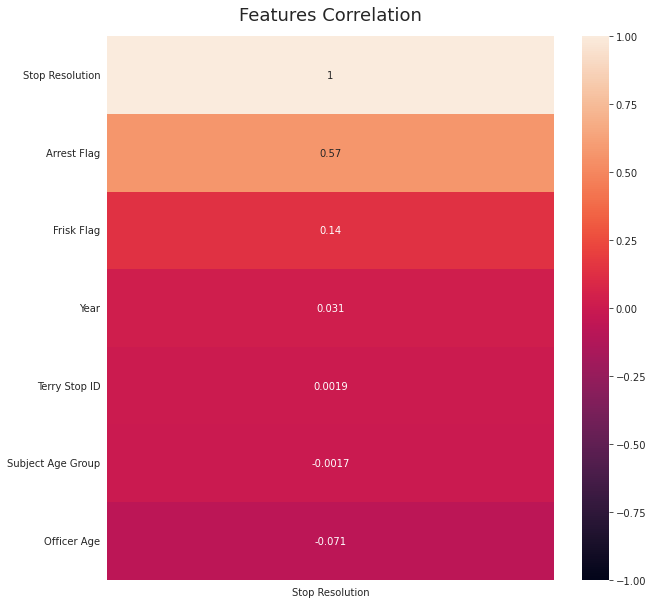

In [21]:
# visualize correlation
# set graph book
sns.set_style('whitegrid')
# set fig size
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df.corr()[['Stop Resolution']].sort_values(by='Stop Resolution', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap=None)
heatmap.set_title('Features Correlation', fontdict={'fontsize':18}, pad=16);
plt.show()

>Flag arrest had the highest correlation with the target

#### Features Distribution

In [22]:
# check all columns distribution plot
def dist_check(my_data):
    sns.set_style('whitegrid')
    plt.figure(figsize=(20,22))
    for i in range(1,11):
        plt.subplot(5, 4, i)
        sns.histplot(my_data, kde=True)

In [ ]:
# plot to check features distribution
features = df.drop(["Month", "Location"], axis=1)

# check distribution data
dist_check(features)        

In [ ]:
# set graph book
sns.set_style('whitegrid')
bar, plt.subplots(figsize=(10 ,8))

sns.countplot(x='Subject Age Group', data=df, palette = 'Stop Resolution')

# set labels
plt.title('class column distribution',fontsize=24)
plt.xlabel('Value',fontsize=14)
plt.ylabel('Square of Value',fontsize=14)

plt.tick_params(axis='both',labelsize=14)

# save visual
#plt.savefig(('class_plot.png'))

# show figure
plt.show()

#### 4.5.1  Target column

In [ ]:
# create a bar plot of Stop Resolution count
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("whitegrid")
sns.countplot(x='Stop Resolution', data=df)

# add title and labels
plt.title("Count of Stop Resolution")
plt.xlabel("Stop Resolution")
plt.ylabel("Count")

# Show plot
plt.show()


The distribution of the target variable is even, meaning the two classes are roughly equal.

In [ ]:
# select the features and target variable
features = ['Time Category']
target = 'Stop Resolution'

# create a violin plot for each feature
sns.set(rc={'figure.figsize':(8,6)})
for feature in features:
    sns.violinplot(x=target, y=feature, data=df)
    plt.title('Feature Distributrion')
    plt.show()


> This shows the distribution is symmetrical, meaning that the values are distributed evenly around the mean, and there are roughly equal numbers of values on either side of the mean

#### Arrest vs Date

In [ ]:
# make pivot table
df.pivot(index="Month"
        columns = "Stop Resolution"
        values = "Subject Age Group"
        aggfunc = "Sum")

In [ ]:
# box plot
df["Subject Age Group"].plot(kind="box")

In [ ]:
# histogram
df["Location"].plot(kind= "hist", 
                   bins= 3)

plt.savefig("loca.png", dpi=300)

In [ ]:
# select the features and target variable
features = ['Year', 'Month']
target = 'Stop Resolution'

# create a violin plot for each feature
sns.set(rc={'figure.figsize':(8,6)})
for feature in features:
    sns.violinplot(x=target, y=feature, data=df)
    plt.show()


In [ ]:
# use only data where an arrest was made and count how many of each weapon type for each age range exists:
plt.figure(figsize=(15,6))
arrested = df[df['Stop Resolution']==1]
sns.countplot(data=df,x='"Subject Age Group',hue='Weapon Type')

# add chart title, and labels:
plt.title('Arrests Per Weapon Type And Subject Age Group', fontsize=20)
plt.xlabel('Weapon Type and Age Group', fontsize=14)
plt.ylabel('Number of Arrests', fontsize=14)

plt.show()

In [ ]:
# select the features and target variable
features = ['Weapon Type']
target = 'Stop Resolution'

# create a violin plot for each feature
sns.set(rc={'figure.figsize':(12,10)})
for feature in features:
    sns.violinplot(x=target, y=feature, data=df)
    plt.title('Feature Distributrion')
    plt.savefig('firearm.png')
    plt.show()


>Most weapons found during the stops were of category non-firearm

In [1]:

# set figure size
plt.figure(figsize=(16, 14))

# create the line plot with color
sns.lineplot(x='Month', y='Stop Resolution', data=df)

# add title
plt.title("Stop Resolutions Over Months")

# tilt x-labels to 45 degrees
plt.xticks(rotation=45)

# add grid
sns.set_style("whitegrid")

plt.savefig('line7.png')


# show plot
plt.show()


NameError: name 'plt' is not defined

In [ ]:
>

### Preprocessing Data

In [2]:
# function to find categorical columns convert and return a df
def process_df(df):
    # Find categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category', 'category']).columns
    
    # One hot encode categorical columns and drop the first one to avoid multi-collinearity
    categorical_ohe = pd.get_dummies(df[categorical_cols], drop_first=True)
    
    # Select numerical columns
    numerical_cols = df.select_dtypes(exclude=['object']).columns
    
    # Combine one-hot encoded categorical columns with numerical columns
    final_df = pd.concat([df[numerical_cols], categorical_ohe], axis=1)
    
    return final_df

# call the function and preview 
final_df = process_df(df)
# make copy
backup = final_df.copy(deep=True)

final_df.head(7)

#### Defining `X` and `y`

To start out, I'll consider `y` to be the **Stop Resolution** variable (`Arrested`) and everything else to be `X`, the **independent features**

In [62]:
# predictors
X  = final_df.drop(["Stop Resolution"], axis=1)

# target
target = final_df["Stop Resolution"]
y = np.ravel(target)

### Training and  Testing  Split

Test and train split was on test at 20% of the data. More data given to training data set to ensure the model get all the patterns and perfom better

In [ ]:
# import relevant library
from sklearn.model_selection import train_test_split

# perform the tarin split
X_train, X_test, y_train, y_test = train_test_split(final_df, y, test_size = 0.2, random_state=0)

# display shape of splits
print(f"Training : {X_train.shape}")
print(f"Testing : {X_test.shape}")

* **Standardization** :
Standardizes the features by removing the mean and scaling to unit variance.

In [ ]:
# import relevant libraries
from sklearn.preprocessing import StandardScaler

# instantiate the scaler class
ss = StandardScaler

# fit the training data
X_train_scaled = ss.fit(X_train)

# transform both the training and testing data
X_train_scaled_transformed = ss.transform(X_train)

# test data
X_test_transformed = ss.transform(X_test)

* **Normalization** : each sample with at least non-zero component is rescaled independently  so that its norm equal zero

In [ ]:
# import relevant libraries
from sklearn.preprocessing import Normalizer

# instantiate the class
norm = Normalizer().fit(X_train)

normalisedX_train = 

* **Encoding Categorical Features**

In [ ]:
# import relevant libraries
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit_transform(X_train)

# 5.0. Modelling

Modelling is the process of creating a mathematical representation of a real-world phenomenon. Modelling involves training a model on a dataset and using it to make predictions on new data. 
These are the algorithims are I will used in my modelling:
* K Neighbors Classifier
* Random Forest Classifier
* Gradient Boosting Machines 
* Extreme Gradient Boosting 


### Suport Vector Machine


In [ ]:
from sklearn.svm import SVC

svc_model = SVC(kernel = "linear") 

In [ ]:
from sklearn.naive_bayes import GuassianNB

gnb_model = GaussianNB()

**KNeighborsClassifier** 
###### baseline model
is a type of instance-based learning this algorithm, a new instance is classified based on its similarity with the neighbors. The KNeighborsClassifier algorithm takes as input the number of nearest neighbors to consider (k), a distance metric to measure the similarity between instances, and the features of the instances. The algorithm first stores all the instances and then when a new instance is encountered, it calculates the similarity between the new instance and all the stored instances and selects the k-neighbors that are closest to the new instance. Finally, the class of the new instance is determined based on the majority class of its k nearest neighbors.

In [ ]:
# import relevant libraries
from sklearn.neighbors import KNeighborsClassifier

# model
knn_model2 = KNeighborsClassifier()


# fit model with training data
knn_model2.fit(X_train, y_train)

# evaluate model
scores = cross_val_score(knn_model2, X_test, y_test, cv=10)

# print the mean accuracy
print("Mean Accuracy: {:.2f}%".format(scores.mean() * 100))
print("Cross validation scores:", scores)

#### Find the optimum parameters.

In [ ]:
# importing necessary libraries
from sklearn.model_selection import GridSearchCV, cross_val_score

# define the model
knn_model = KNeighborsClassifier()

#  efine the parameter grid
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

# create the GridSearchCV object
grid_search = GridSearchCV(knn_model, param_grid, cv=10, scoring='recall')

# fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# print the results
print("Best parameters:", best_params)
print("Best recall score: {:.2f}".format(best_score))

# evaluate the model using cross-validation
scores = cross_val_score(grid_search, X_test, y_test, cv=10)


**Decision Trees**
A Decision Tree works by creating a tree-like structure, where each internal node represents a feature and the branches represent the possible values of the feature. Each leaf node represents the prediction or target variable. The tree is built by recursively splitting the data into subsets based on the feature that gives the highest information gain until a stopping criterion is reached. The final tree can be used to make predictions on new data by traversing the tree and following the appropriate branch based on the feature values.
This is my base model.

In [ ]:
# import relevant libraries
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


# initialize the Decision Tree classifier
dct_model = DecisionTreeClassifier(criterion='gini', max_depth=None)

# fit the model to the training data
dct_model.fit(X_train, y_train)

# evaluate model
scores = cross_val_score(dct_model, X_test, y_test, cv=10)

# evaluate the model's accuracy
print("Mean Accuracy: {:.2f}%".format(scores.mean() * 100))
print("Cross validation scores:", scores)

**Random Forest:** Random Forest is an ensemble learning method that uses multiple decision trees to make predictions. The idea behind Random Forest is to generate many decision trees and combine their predictions to produce a more accurate and stable result. Random Forest is a popular choice for binary classification problems because it can handle non-linear relationships between features and the target, and it can also handle missing data and noisy data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# initialize the classifier
rfc_model = RandomForestClassifier(n_estimators=100, random_state=0)

# train the classifier
rfc_model.fit(X_train, y_train)

# predict the class labels for the test set
y_pred = rfc_model.predict(X_test)

# evaluate model
scores = cross_val_score(rfc_model, X_test, y_test, cv=10)

# evaluate the model's accuracy
print("Mean Accuracy: {:.2f}%".format(scores.mean() * 100))
print("Cross validation scores:", scores)

##### Function to evaluate the models
The function takes a model as input and fits it to the training data after transforming it using a MinMaxScaler. Then, the model is used to make predictions on both the training and test datasets, and the performance is evaluated using accuracy, precision, recall, and F1-score. The results are stored in a Pandas dataframe and returned.


In [ ]:
def evaluate_model(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    train_prec = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_pred)
    
    test_acc = accuracy_score(y_test, y_test_pred)
    test_prec = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_pred)
    
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
    
    plt.plot(fpr_train, tpr_train, 'b', label='Train AUC = %0.2f' % train_roc_auc)
    plt.plot(fpr_test, tpr_test, 'g', label='Test AUC = %0.2f' % test_roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.show()
    
    print("Train Accuracy: {:.2f}%".format(train_acc * 100))
    print("Train Precision: {:.2f}%".format(train_prec * 100))
    print("Train Recall: {:.2f}%".format(train_recall * 100))
    print("Train F1-Score: {:.2f}".format(train_f1))
    print("Train Area under the ROC curve: {:.2f}".format(train_roc_auc))
    
    print("\nTest Accuracy: {:.2f}%".format(test_acc * 100))
    print("Test Precision: {:.2f}%".format(test_prec * 100))
    print("Test Recall: {:.2f}%".format(test_recall * 100))
    print("Test F1-Score: {:.2f}".format(test_f1))


## 6. Model Evaluation

I evaluate how well the prediction model is working. For this evaluation, the most important metrics are recall and precision.

**Recall** measures how many arrests the model correctly identified, out of all the actual arrests that happened. A high recall value means that the model is good at finding all the arrests, and not missing any. This is exactly how I inted my model to help n solving the real problem by cirrectly indicating an arrest.

**Precision** measures how many of the predictions made by the model were actually correct. A high precision value means that the model is good at not making any false predictions, such as predicting that an arrest was made when it actually wasn't.

**F1** score, which balances recall and precision and provides a single score to evaluate the model. The F1 score gives a good overall picture of how well the model is doing in finding all the arrests and not making false predictions.

By using these metrics, I can compare different models and choose the best one for making predictions about arrests during Terry stops.

In [ ]:
evaluate_model(knn_model2)

>The metrics include accuracy, precision, recall, F1-Score, and area under the ROC curve. The train accuracy is 97.80%, indicating that the model was able to correctly classify 97.80% of the samples in the training dataset. The train precision is 99.33%, which means that the model was able to correctly identify 99.33% of the positive cases. The train recall is 91.63%, indicating that the model was able to correctly identify 91.63% of the positive cases. The train F1-Score is 0.95, which is a weighted average of precision and recall. The train area under the ROC curve is 0.96, indicating that the model's ability to distinguish between positive and negative cases is good.

>The test accuracy is 95.62%, which is a little lower than the train accuracy, but still a good score. The test precision is 97.74%, which is slightly lower than the train precision but still a good score. The test recall is 84.31%, which is lower than the train recall, but still a good score. The test F1-Score is 0.91, which is lower than the train F1-Score, but still a good score.

>In conclusion, the model's performance on the train dataset is excellent, with high accuracy, precision, recall, F1-Score, and area under the ROC curve. The model's performance on the test dataset is also good, but slightly lower than the train performance.






In [ ]:
# import relevant libraries
from sklearn.metrics import confusion_matrix

# def function to retrun confusion matrix
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,8))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.show()


**Confusion matrix** a summary of the predictions made by a binary classification model compared to the actual target variable values. It is a 2x2 table that shows the count of True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN) for a binary classifier.

* True Positive (TP) - The number of instances that the model correctly predicted as positive.

* False Positive (FP) - The number of instances that the model predicted as positive but were actually negative.

* True Negative (TN) - The number of instances that the model correctly predicted as negative.

* False Negative (FN) - The number of instances that the model predicted as negative but were actually positive.

From the confusion matrix, several important evaluation metrics can be derived, such as precision, recall, F1-score, and the area under the receiver operating characteristic (ROC) curve. These metrics provide a more complete picture of the model's performance, especially in cases where the data is imbalanced or where accuracy is not the only concern.





In [ ]:
plot_confusion_matrix(knn_model2)

>Most of the prediction the model made were correct, the true positivity rate was high.

In [ ]:
# import relevant libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# create the classifier, fit it on the training data and make predictions on the test set:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# check the Accuracy:
print('Logistic Regression Accuracy: ', accuracy_score(y_test, y_pred)*100,'%')

# print classification report:
print(classification_report(y_test, y_pred))

: 

## 7. Conclusion:


After evaluating four classification models, the most accurate model was found to be the Random Forest, with an accuracy of 80.35%. This was followed by Decision Trees at 79.96%, Logistic Regression at 79.92%, and KNN at 79.72%.

The Random Forest model was able to accurately determine whether or not a Terry Stop would result in an arrest 81.19% of the time, with the most influential features being related to the precinct and arrest flag. The top five features were: 1) Arrest Flag Given, 2) Arrest Flag Not Given, 3) Unknown Precinct, 4) West Precinct, and 5) Frisk Flag Given.

## 8. Recommendations

Train officers on the appropriate times to make an arrest during a Terry Stop as this is a key indicator of arrests.
Try to capture the officer's precinct for all Terry Stops to better predict arrests.
Train officers on the appropriate times to frisk someone, as this is another key indicator of arrests.
Next Steps:

Although 80% accuracy is decent, there is still room for improvement. To increase accuracy, the model could be further fine-tuned through data cleaning or adjusting the model inputs. Additionally, exploring other classification models, such as deep learning models, could lead to a more accurate prediction.



